In [1]:
import ast
import copy
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from aocd import get_data, submit

DAY = 14
YEAR = 2022

In [2]:
# use test data
raw_test = """498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9"""

# use real data
raw = get_data(day=DAY, year=YEAR)

print(raw_test)

498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9


In [3]:
def parse_data(data):
    data = data.split("\n")
    data = [np.array([el.split(",") for el in re.findall("(\d+,\d+)", d)], dtype=int) for d in data]
    return data


dummy = parse_data(raw_test)
real = parse_data(raw)

dummy

[array([[498,   4],
        [498,   6],
        [496,   6]]),
 array([[503,   4],
        [502,   4],
        [502,   9],
        [494,   9]])]

# Part 1

In [53]:
def drop_sand(cave, old, bounds):
    x_min, x_max, y_max = bounds
    cave = cave.copy()

    while True:
        if old[1] > y_max or cave[(500, 0)] == 2:
            return cave

        ll = tuple(np.array(old) + [-1, 1])
        lc = tuple(np.array(old) + [0, 1])
        lr = tuple(np.array(old) + [1, 1])

        if lc not in cave:
            old = lc
            continue

        if ll[0] < x_min:
            return cave
        elif ll not in cave:
            old = ll
        elif lr[1] >= x_max:
            return cave
        elif lr not in cave:
            old = lr
        else:
            cave[old] = 2
            return cave


def plot_cave(cave, bounds):
    x_min, x_max, y_max = bounds
    mask = np.zeros((y_max + 1, x_max - x_min + 1))
    for c, v in cave.items():
        mask[(c[1], c[0] - x_min)] = v

    fig, ax = plt.subplots(dpi=200)
    ax.imshow(mask)


def construct_cave(source):
    cave = {source: -1}
    for scan in data:
        for idx in range(len(scan) - 1):
            x1, y1 = scan[idx]
            x2, y2 = scan[idx + 1]
            for x in range(min(x1, x2), max(x1, x2) + 1):
                for y in range(min(y1, y2), max(y1, y2) + 1):
                    cave[(x, y)] = 1

    return cave


data = real

source = (500, 0)
cave = construct_cave(source)
coords = np.array([c for c, v in cave.items() if v != -1])
x_min, _ = np.min(coords, axis=0)
x_max, y_max = np.max(coords, axis=0)
bounds = x_min, x_max, y_max

old = cave.copy()
while True:
    new = drop_sand(old, source, bounds)
    if new == old:
        break
    old = new.copy()

result = np.count_nonzero([v == 2 for v in new.values()])
result

961

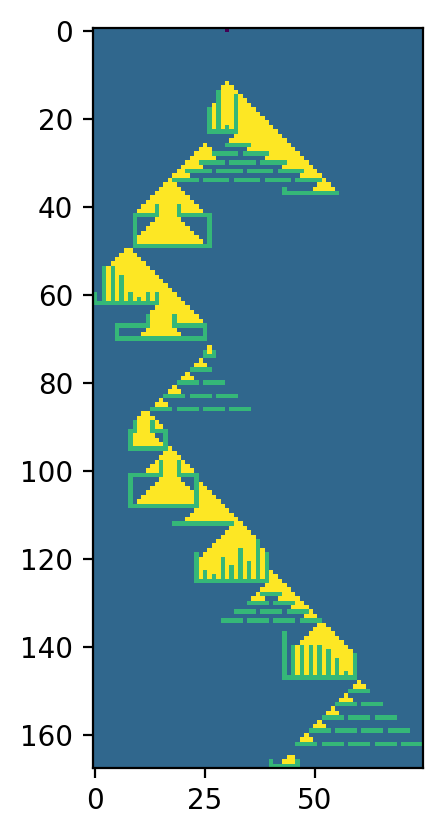

In [54]:
plot_cave(new, bounds)

# Part 2

In [51]:
data = real

source = (500, 0)
cave = construct_cave(source)
coords = np.array([c for c, v in cave.items() if v != -1])
y_max = np.max(coords[:, 1], axis=0) + 2
x_min, x_max = source[0] - y_max, source[0] + y_max
bounds = x_min, x_max, y_max

for x in range(x_min, x_max + 1):
    cave[(x, y_max)] = 1

old = cave.copy()
while True:
    new = drop_sand(old, source, bounds)
    if new == old:
        break
    old = new.copy()

result = np.count_nonzero([v == 2 for v in new.values()])
result

26375

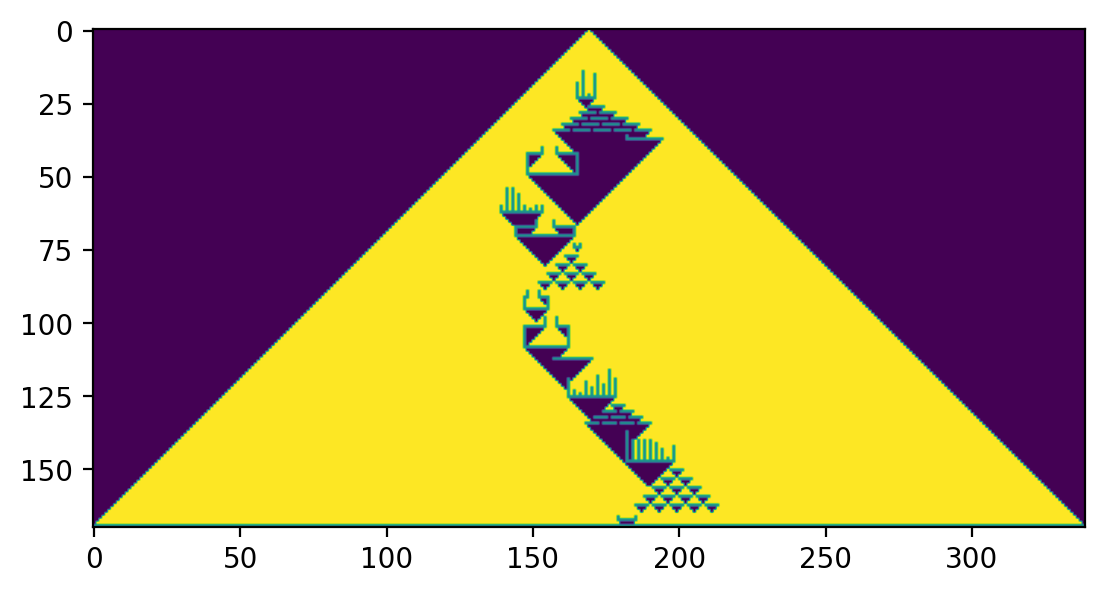

In [52]:
plot_cave(new, bounds)

In [49]:
# submit(result, part="a", day=DAY, year=YEAR)